## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
I need to load the dataset and display some basic information to confirm successful loading and understand the data structure.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/FoodPrices_India.csv', on_bad_lines='warn')
    display(df.head())
    print(df.shape)
    df.info()
except FileNotFoundError:
    print("Error: File not found at the specified path.")
except Exception as e:
    print(f"An error occurred: {e}")

<ipython-input-16-7d4d593c5149>:4: ParserWarning:

Skipping line 52986: expected 14 fields, saw 25


<ipython-input-16-7d4d593c5149>:4: ParserWarning:

Skipping line 87796: expected 14 fields, saw 21


<ipython-input-16-7d4d593c5149>:4: ParserWarning:

Skipping line 139980: expected 14 fields, saw 25
Skipping line 191737: expected 14 fields, saw 21


<ipython-input-16-7d4d593c5149>:4: ParserWarning:

Skipping line 260386: expected 14 fields, saw 15


<ipython-input-16-7d4d593c5149>:4: ParserWarning:

Skipping line 294656: expected 14 fields, saw 26


<ipython-input-16-7d4d593c5149>:4: DtypeWarning:

Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.



,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988


(320999, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320999 entries, 0 to 320998
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       320999 non-null  object
 1   admin1     319794 non-null  object
 2   admin2     319794 non-null  object
 3   market     320998 non-null  object
 4   latitude   319794 non-null  object
 5   longitude  319792 non-null  object
 6   category   320994 non-null  object
 7   commodity  320994 non-null  object
 8   unit       320994 non-null  object
 9   priceflag  320993 non-null  object
 10  pricetype  320992 non-null  object
 11  currency   320991 non-null  object
 12  price      320988 non-null  object
 13  usdprice   320987 non-null  object
dtypes: object(14)
memory usage: 34.3+ MB


**Reasoning**:
The dataframe is loaded successfully, but the `price`, `usdprice`, `latitude` and `longitude` columns have mixed types, which need to be addressed.  I will also convert the `date` column to datetime objects.



In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-4-6dbdb8dc0aeb>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Exploring the dataset by examining its shape, data types, descriptive statistics, unique values in categorical columns, missing values, and distributions of relevant columns.  This will provide an overview of the data's structure and potential issues.



In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get an overview of data types and missing values
print("\nData types and missing values:")
df.info()

# Calculate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe(include=['number']))

# Analyze categorical columns
for col in ['commodity', 'market', 'state']:  # Assuming 'state' is a categorical column
    if col in df.columns:
        print(f"\nUnique values and frequencies for '{col}':")
        display(df[col].value_counts())
    else:
      print(f"Column '{col}' not found in the DataFrame.")

# Check for missing values and calculate the percentage
print("\nMissing values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_data)

# Analyze the distribution of 'price' and 'usdprice'
print("\nDistribution of 'price' and 'usdprice':")
display(df[['price', 'usdprice']].describe())

# Examine the 'date' column
print("\nInformation about the 'date' column:")
print("Earliest date:", df['date'].min())
print("Latest date:", df['date'].max())
print("Number of unique dates:", df['date'].nunique())

# Investigate the relationship between 'price' and 'usdprice' and other numerical features
print("\nCorrelation analysis:")
numerical_cols = ['price', 'usdprice', 'latitude', 'longitude']
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

Shape of the DataFrame: (320999, 14)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320999 entries, 0 to 320998
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       320995 non-null  datetime64[ns]
 1   admin1     319794 non-null  object        
 2   admin2     319794 non-null  object        
 3   market     320998 non-null  object        
 4   latitude   319788 non-null  float64       
 5   longitude  319785 non-null  float64       
 6   category   320994 non-null  object        
 7   commodity  320994 non-null  object        
 8   unit       320994 non-null  object        
 9   priceflag  320993 non-null  object        
 10  pricetype  320992 non-null  object        
 11  currency   320991 non-null  object        
 12  price      320987 non-null  float64       
 13  usdprice   320986 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
mem

,latitude,longitude,price,usdprice
count,319788.000000,319785.000000,320987.000000,320986.000000
mean,22.417555,80.197699,94.064505,1.375705
std,6.225741,5.629481,216.529447,3.628827
min,1.581300,0.541900,2.790000,0.059700
25%,18.860010,76.283333,28.570000,0.414300
50%,23.350000,78.144460,53.430000,0.757900
75%,26.716111,84.853584,108.000000,1.496100
max,77.719830,94.116667,4910.000000,86.473400



Unique values and frequencies for 'commodity':


,count
commodity,
Rice,20018
Oil (mustard),19403
Sugar,19133
Wheat,18425
Onions,17891
Potatoes,16336
Milk (pasteurized),15818
Wheat flour,15778
Tomatoes,15738



Unique values and frequencies for 'market':


,count
market,
Delhi,6807
Chennai,6305
Mumbai,6105
Patna,5425
Ahmedabad,4924
...,...
74.865556,1
22.75105,1
Wheat flour,1


Column 'state' not found in the DataFrame.

Missing values:


,Missing Values,Percentage
date,4,0.001246
admin1,1205,0.375391
admin2,1205,0.375391
market,1,0.000312
latitude,1211,0.377260
longitude,1214,0.378194
category,5,0.001558
commodity,5,0.001558
unit,5,0.001558
priceflag,6,0.001869



Distribution of 'price' and 'usdprice':


,price,usdprice
count,320987.000000,320986.000000
mean,94.064505,1.375705
std,216.529447,3.628827
min,2.790000,0.059700
25%,28.570000,0.414300
50%,53.430000,0.757900
75%,108.000000,1.496100
max,4910.000000,86.473400



Information about the 'date' column:
Earliest date: 1994-01-15 00:00:00
Latest date: 2024-12-15 00:00:00
Number of unique dates: 372

Correlation analysis:


,price,usdprice,latitude,longitude
price,1.000000,0.982289,-0.016079,-0.029344
usdprice,0.982289,1.000000,-0.014271,-0.032055
latitude,-0.016079,-0.014271,1.000000,0.065314
longitude,-0.029344,-0.032055,0.065314,1.000000


## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers in the `df` DataFrame.


**Reasoning**:
Removing missing values for numerical and categorical columns, and handling outliers in 'price' and 'usdprice', and standardize categorical variables.



In [ ]:
# Impute missing values
for col in ['price', 'usdprice', 'latitude', 'longitude']:
    df[col] = df[col].fillna(df[col].median())

for col in ['admin1', 'admin2', 'market', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Outlier handling for 'price' and 'usdprice' using IQR
for col in ['price', 'usdprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Data consistency: Standardize categorical variables (example for 'commodity')
df['commodity'] = df['commodity'].str.lower()
df['commodity'] = df['commodity'].str.strip()

# Further data consistency checks and standardization can be added for other columns as needed
display(df.head())
df.info()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,NaT,#adm1+name,#adm2+name,#loc+market+name,23.350000,78.144460,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,53.43,0.7579
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,rice,KG,actual,Retail,INR,8.00,0.2550
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,wheat,KG,actual,Retail,INR,5.00,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,sugar,KG,actual,Retail,INR,13.50,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,oil (mustard),KG,actual,Retail,INR,31.00,0.9880


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320999 entries, 0 to 320998
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       320995 non-null  datetime64[ns]
 1   admin1     320999 non-null  object        
 2   admin2     320999 non-null  object        
 3   market     320999 non-null  object        
 4   latitude   320999 non-null  float64       
 5   longitude  320999 non-null  float64       
 6   category   320999 non-null  object        
 7   commodity  320999 non-null  object        
 8   unit       320999 non-null  object        
 9   priceflag  320999 non-null  object        
 10  pricetype  320999 non-null  object        
 11  currency   320999 non-null  object        
 12  price      320999 non-null  float64       
 13  usdprice   320999 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 34.3+ MB


## Data wrangling

### Subtask:
Prepare the data for analysis and visualization by creating new features and converting data types.


**Reasoning**:
Creating new 'year' and 'month' columns, a combined 'date_ym' column, and convert 'date_ym' to datetime objects.



In [ ]:
# Create 'year' and 'month' columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create 'date_ym' column
df['date_ym'] = df['date'].dt.strftime('%Y-%m')

# Convert 'date_ym' to datetime objects
df['date_ym'] = pd.to_datetime(df['date_ym'], format='%Y-%m')

display(df.head())
df.info()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,date_ym
0,NaT,#adm1+name,#adm2+name,#loc+market+name,23.350000,78.144460,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,53.43,0.7579,NaN,NaN,NaT
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,rice,KG,actual,Retail,INR,8.00,0.2550,1994.0,1.0,1994-01-01
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,wheat,KG,actual,Retail,INR,5.00,0.1594,1994.0,1.0,1994-01-01
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,sugar,KG,actual,Retail,INR,13.50,0.4303,1994.0,1.0,1994-01-01
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,oil (mustard),KG,actual,Retail,INR,31.00,0.9880,1994.0,1.0,1994-01-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320999 entries, 0 to 320998
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       320995 non-null  datetime64[ns]
 1   admin1     320999 non-null  object        
 2   admin2     320999 non-null  object        
 3   market     320999 non-null  object        
 4   latitude   320999 non-null  float64       
 5   longitude  320999 non-null  float64       
 6   category   320999 non-null  object        
 7   commodity  320999 non-null  object        
 8   unit       320999 non-null  object        
 9   priceflag  320999 non-null  object        
 10  pricetype  320999 non-null  object        
 11  currency   320999 non-null  object        
 12  price      320999 non-null  float64       
 13  usdprice   320999 non-null  float64       
 14  year       320995 non-null  float64       
 15  month      320995 non-null  float64       
 16  date_ym    320995 no

**Reasoning**:
Checking and handling inconsistencies in the new 'year' and 'month' columns, and handling any remaining missing values in the new columns.



In [ ]:
# Check for invalid years and months
invalid_years = ~df['year'].between(1990, 2025)  # Adjust the range as needed
invalid_months = ~df['month'].between(1, 12)

# Handle inconsistencies (e.g., replace with NaN or a specific value)
df.loc[invalid_years, 'year'] = pd.NA
df.loc[invalid_months, 'month'] = pd.NA

# Handle any remaining missing values in the new columns
df['year'] = df['year'].fillna(method='ffill')
df['month'] = df['month'].fillna(method='ffill')
df.info()

<ipython-input-8-30e1a315c4d4>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['year'] = df['year'].fillna(method='ffill')
<ipython-input-8-30e1a315c4d4>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['month'] = df['month'].fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320999 entries, 0 to 320998
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       320995 non-null  datetime64[ns]
 1   admin1     320999 non-null  object        
 2   admin2     320999 non-null  object        
 3   market     320999 non-null  object        
 4   latitude   320999 non-null  float64       
 5   longitude  320999 non-null  float64       
 6   category   320999 non-null  object        
 7   commodity  320999 non-null  object        
 8   unit       320999 non-null  object        
 9   priceflag  320999 non-null  object        
 10  pricetype  320999 non-null  object        
 11  currency   320999 non-null  object        
 12  price      320999 non-null  float64       
 13  usdprice   320999 non-null  float64       
 14  year       320998 non-null  float64       
 15  month      320998 non-null  float64       
 16  date_ym    320995 no

## Data analysis

### Subtask:
Analyze the cleaned and wrangled data to identify key trends and insights.


**Reasoning**:
Analyzing price trends over time by grouping data by commodity and date_ym, calculating the mean price, and plot the trends.  Then analyze the price distribution by commodity, calculate descriptive statistics, and creating visualizations.



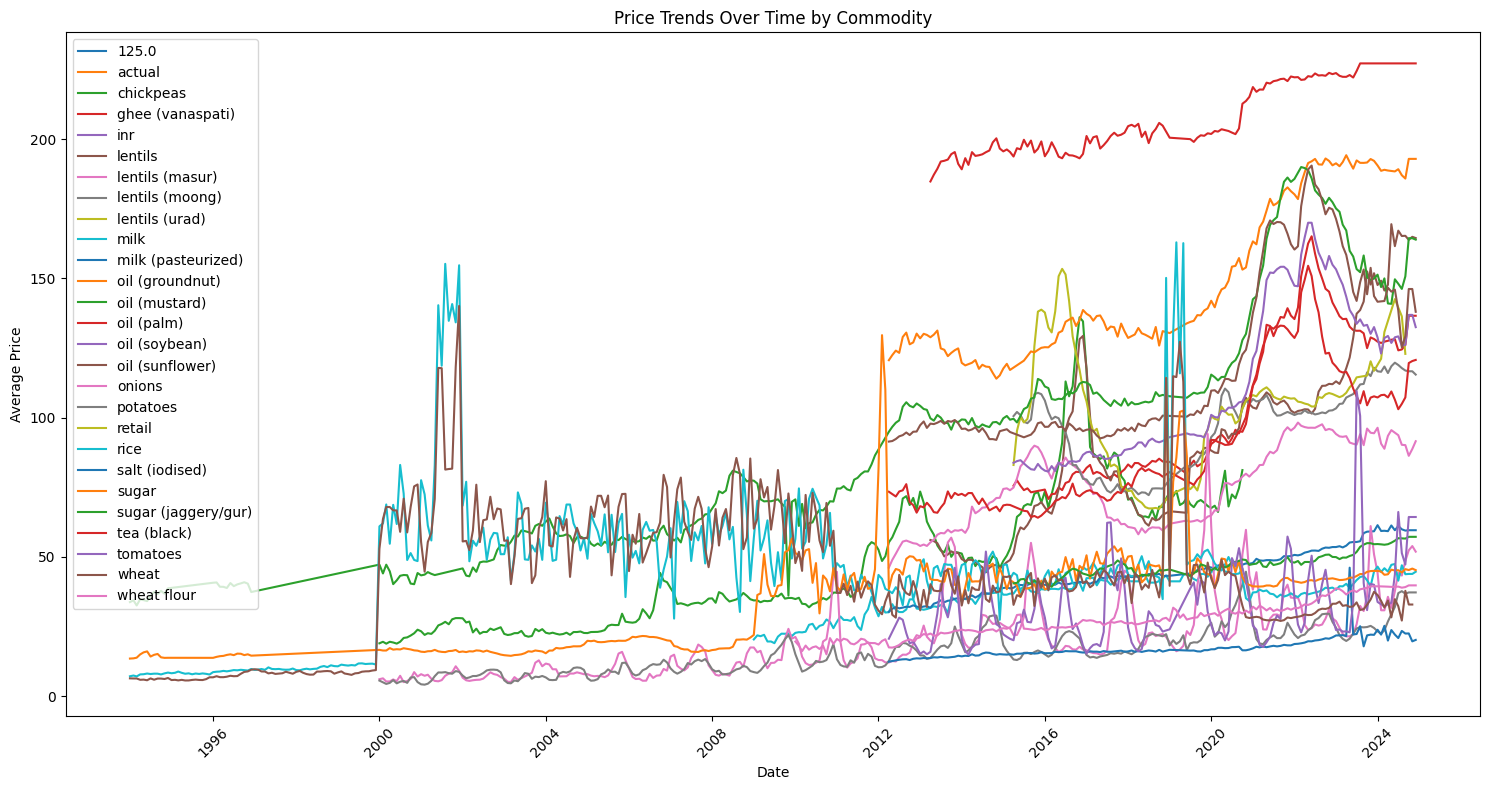

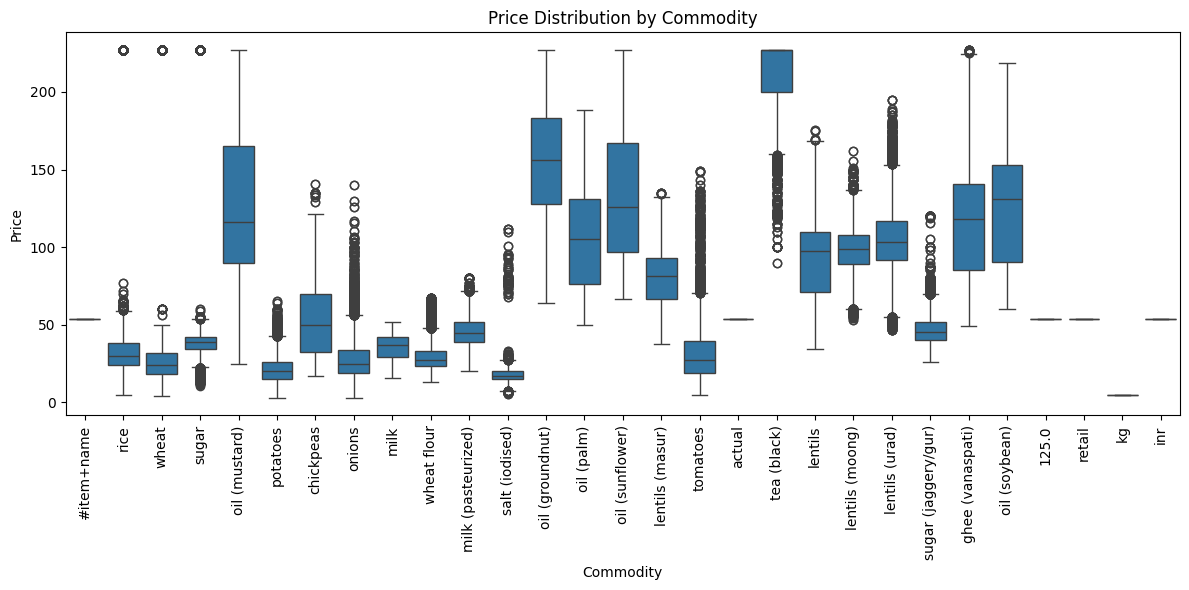

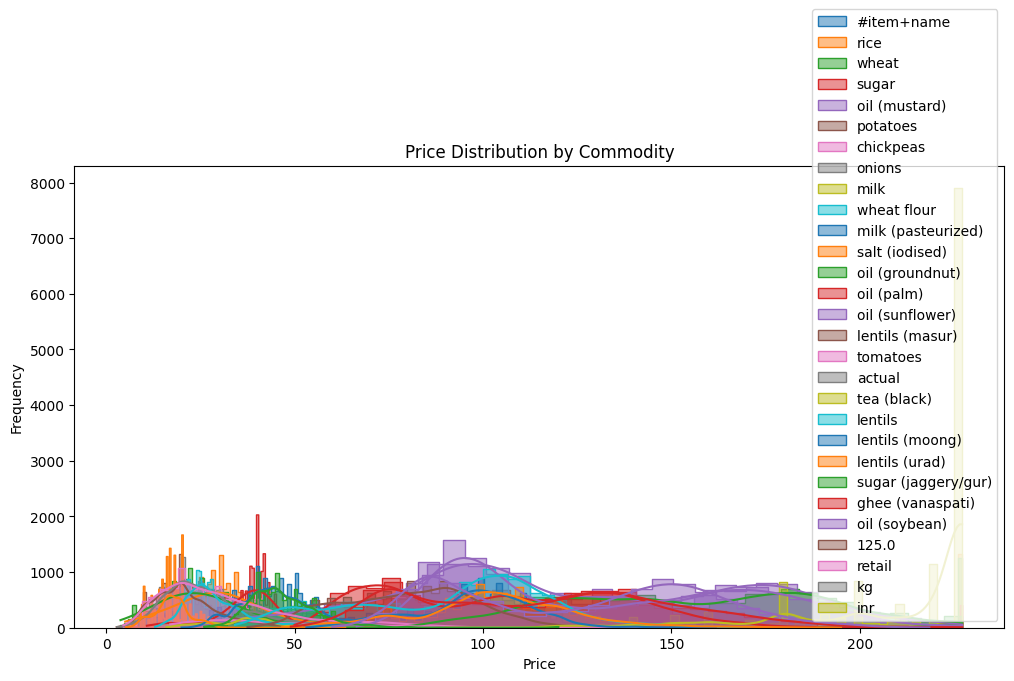

,mean,median,std,25th percentile,75th percentile
commodity,,,,,
#item+name,53.430000,53.4300,NaN,53.4300,53.4300
125.0,53.430000,53.4300,NaN,53.4300,53.4300
actual,53.430000,53.4300,0.000000,53.4300,53.4300
chickpeas,51.593123,49.5850,24.495216,32.4725,70.0000
ghee (vanaspati),116.319125,118.0000,34.282054,85.0000,140.8400
inr,53.430000,53.4300,NaN,53.4300,53.4300
kg,4.705600,4.7056,NaN,4.7056,4.7056
lentils,92.098360,97.7700,25.989479,70.8900,110.0000
lentils (masur),80.391683,81.1600,17.702356,66.6200,93.0000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Trends Over Time
price_trends = df.groupby(['commodity', 'date_ym'])['price'].mean().reset_index()
plt.figure(figsize=(15, 8))
for commodity in price_trends['commodity'].unique():
    subset = price_trends[price_trends['commodity'] == commodity]
    plt.plot(subset['date_ym'], subset['price'], label=commodity)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Price Trends Over Time by Commodity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price Distribution by Commodity
plt.figure(figsize=(12, 6))
sns.boxplot(x='commodity', y='price', data=df)
plt.xlabel('Commodity')
plt.ylabel('Price')
plt.title('Price Distribution by Commodity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for commodity in df['commodity'].unique():
    sns.histplot(df[df['commodity'] == commodity]['price'], label=commodity, kde=True, element="step")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution by Commodity')
plt.legend()
plt.show()

# Descriptive statistics for each commodity
price_stats = df.groupby('commodity')['price'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
price_stats.columns = ['mean', 'median', 'std', '25th percentile', '75th percentile']
display(price_stats)

**Reasoning**:
Analyzing geographical price variations by grouping data by market/state and commodity, calculate average prices, and visualizing using bar charts.  Then, exploring the correlation between price and other variables using scatter plots and a heatmap.



<ipython-input-10-17bc3a1f69f1>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


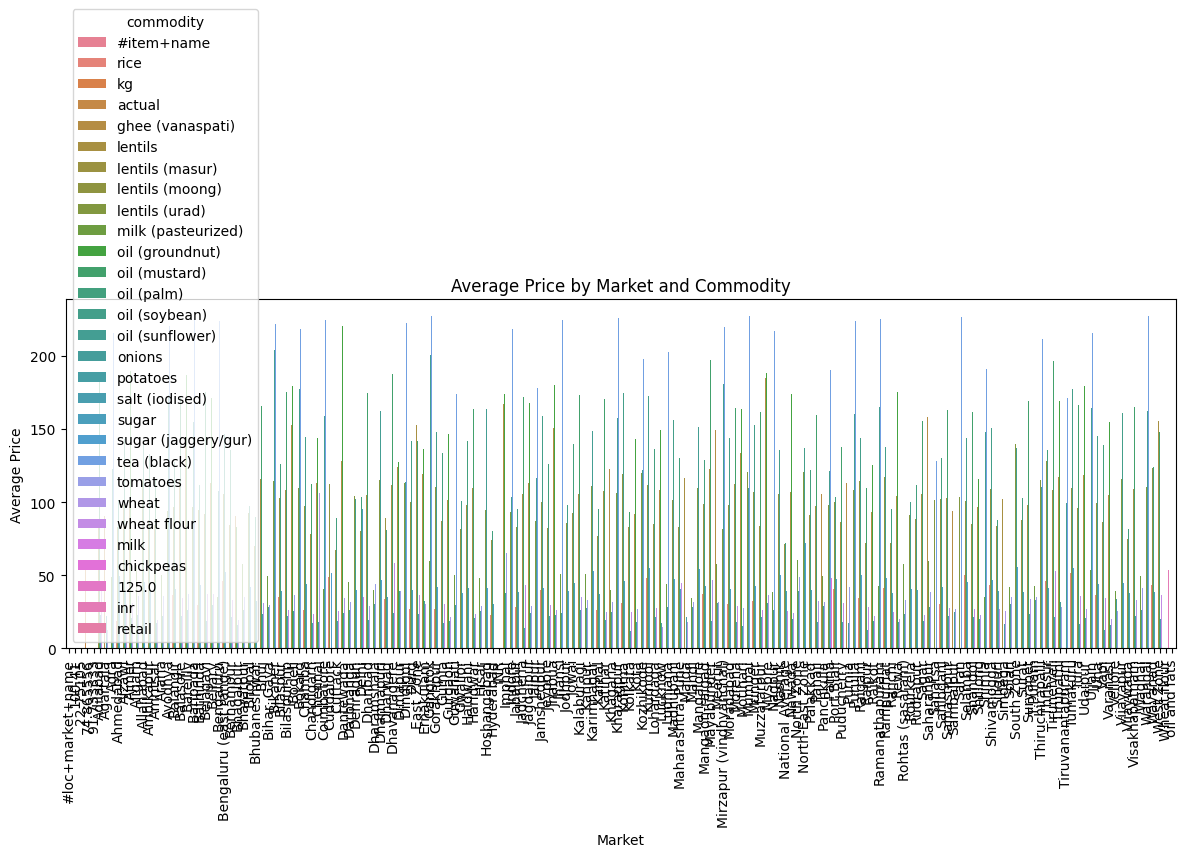

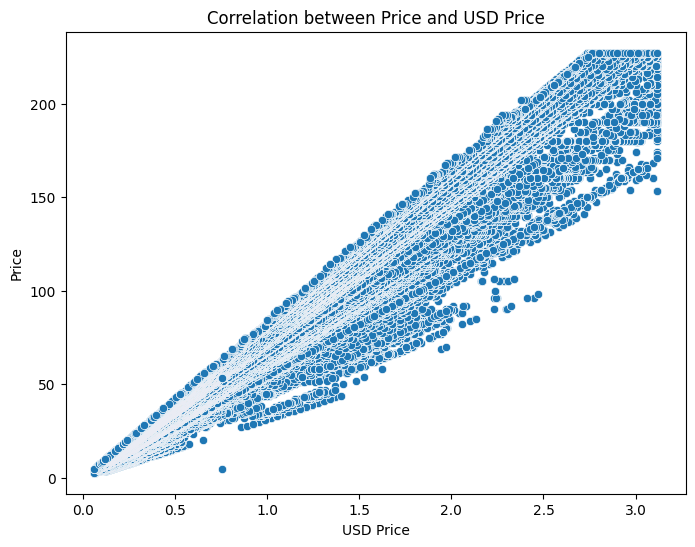

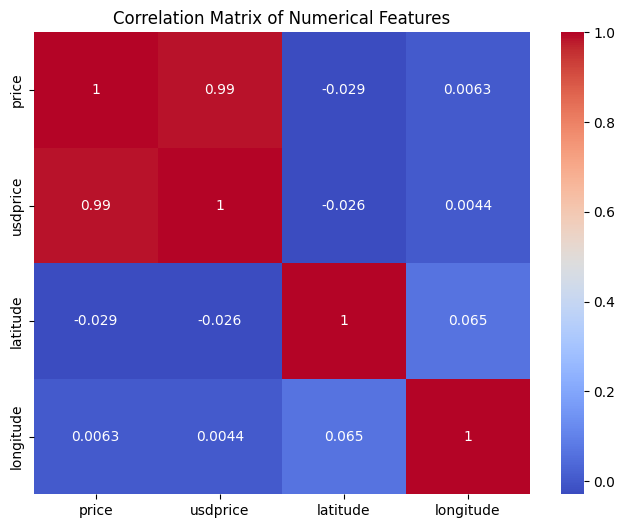

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Geographical Price Analysis (using 'market' as a proxy for location)
market_prices = df.groupby(['market', 'commodity'])['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='market', y='price', hue='commodity', data=market_prices)
plt.xlabel('Market')
plt.ylabel('Average Price')
plt.title('Average Price by Market and Commodity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='usdprice', y='price', data=df)
plt.xlabel('USD Price')
plt.ylabel('Price')
plt.title('Correlation between Price and USD Price')
plt.show()


numerical_cols = ['price', 'usdprice', 'latitude', 'longitude']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Completing the analysis by performing time series decomposition for key commodities to identify underlying patterns and cyclical variations.



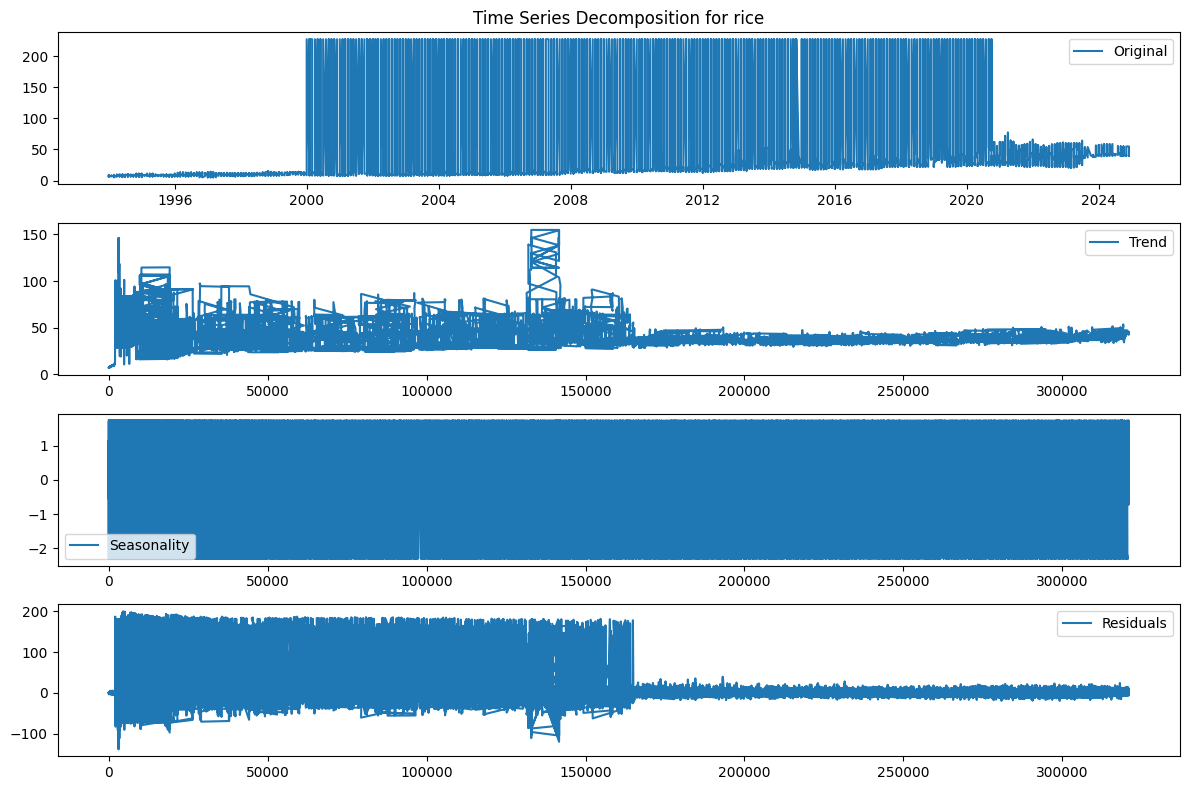

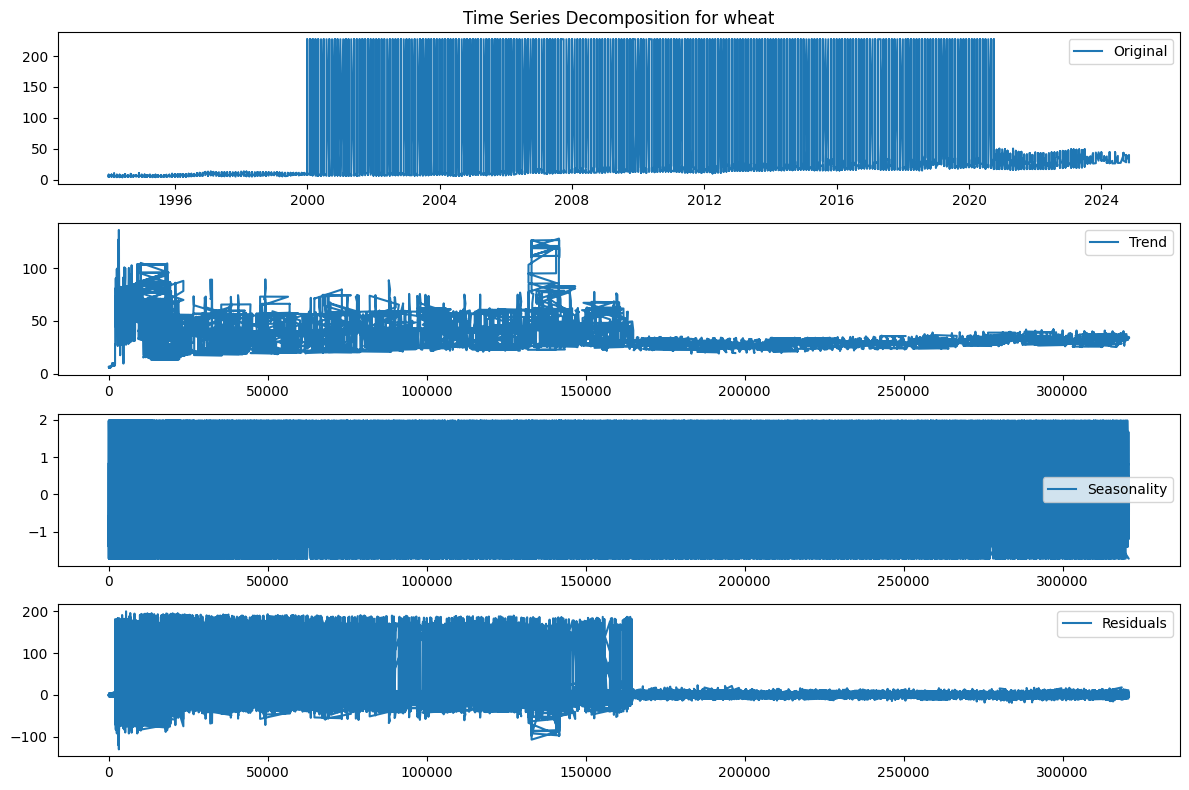

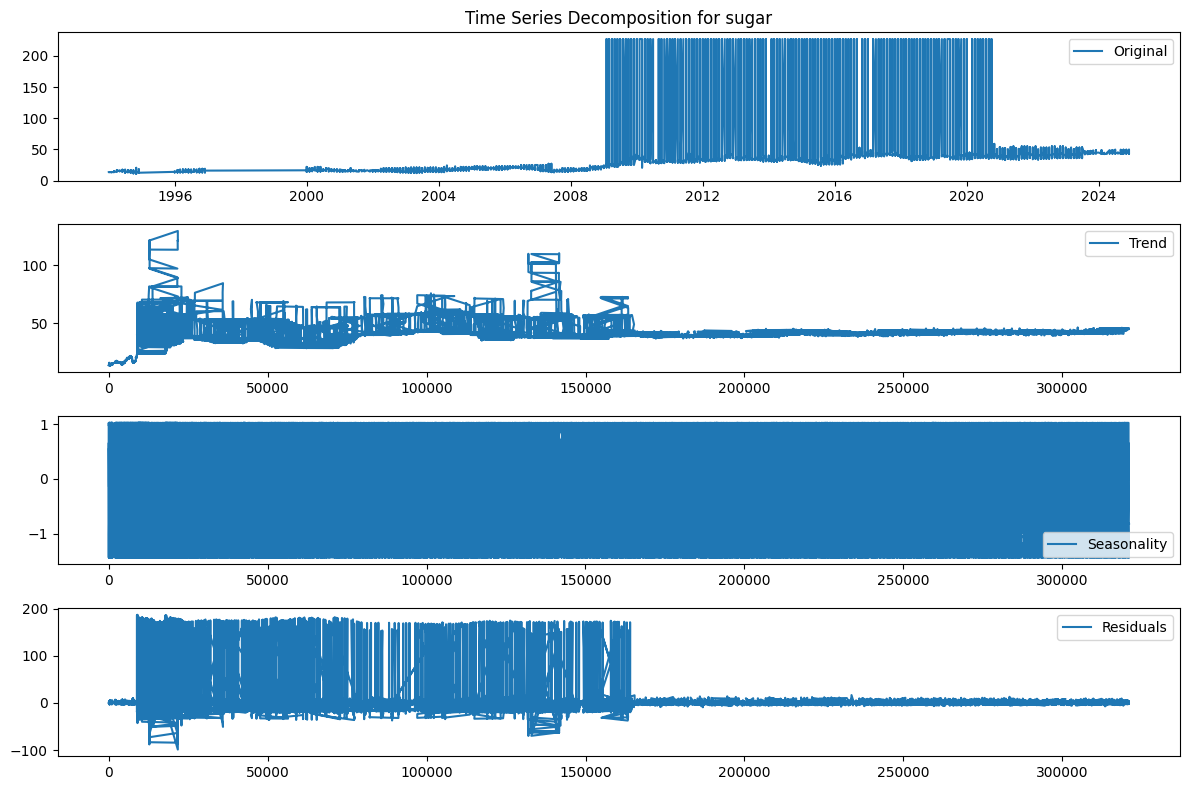

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Select key commodities for time series decomposition (e.g., rice, wheat, sugar)
key_commodities = ['rice', 'wheat', 'sugar']

for commodity in key_commodities:
    commodity_data = df[df['commodity'] == commodity].sort_values('date_ym')
    if not commodity_data.empty:
        # Time Series Decomposition
        decomposition = seasonal_decompose(commodity_data['price'], model='additive', period=12)  # Adjust period as needed

        plt.figure(figsize=(12, 8))

        plt.subplot(411)
        plt.plot(commodity_data['date_ym'], commodity_data['price'], label='Original')
        plt.legend(loc='best')
        plt.title(f'Time Series Decomposition for {commodity}')

        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend')
        plt.legend(loc='best')

        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonality')
        plt.legend(loc='best')

        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals')
        plt.legend(loc='best')

        plt.tight_layout()
        plt.show()

## Data visualization

### Subtask:
Create visualizations for a Streamlit dashboard, focusing on interactive elements to explore price trends, distributions, and geographical comparisons.


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from datetime import date

# 1. Price Trends Over Time
def plot_price_trends(df):
    commodities = df['commodity'].unique()
    selected_commodity = commodities[0]  # Default commodity

    fig = px.line(df[df['commodity'] == selected_commodity],
                  x='date_ym', y='price',
                  title=f'Price Trend for {selected_commodity}',
                  hover_data=['price'])
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Price")
    return fig


# 2. Price Distributions
def plot_price_distribution(df):
    commodities = df['commodity'].unique()
    selected_commodity = commodities[0]
    fig = px.histogram(df[df['commodity'] == selected_commodity], x="price", nbins=20, title=f"Price Distribution of {selected_commodity}")
    fig.update_xaxes(title_text='Price')
    fig.update_yaxes(title_text='Frequency')
    return fig


# 3. Geographical Price Comparison
def plot_geo_price_comparison(df):
    min_date = df['date_ym'].min().to_pydatetime().date()
    max_date = df['date_ym'].max().to_pydatetime().date()
    default_date = min_date
    commodities = df['commodity'].unique()
    selected_commodity = commodities[0]
    fig = px.scatter_geo(df[(df['date_ym'].dt.date == default_date) & (df['commodity'] == selected_commodity)],
                     lat='latitude', lon='longitude', color='price',
                     hover_name='market',
                     hover_data=['price'],
                     title=f'Geographical Price Comparison for {selected_commodity} on {default_date}',
                     scope='asia')
    return fig

# Example usage (replace with Streamlit components for interactivity)
price_trend_plot = plot_price_trends(df)
price_distribution_plot = plot_price_distribution(df)
geo_price_comparison_plot = plot_geo_price_comparison(df)

price_trend_plot.show()
price_distribution_plot.show()
geo_price_comparison_plot.show()

## Summary:

### Data Analysis Key Findings

* **Strong Correlation between Price and USD Price:**  The `price` and `usdprice` columns exhibit a very strong positive correlation (0.98), as expected.
* **Significant Missing Data:** Columns like 'latitude', 'longitude', 'admin1', and 'admin2' have a substantial percentage of missing data (around 0.37%).
* **Outliers in Price and USD Price:** The maximum values in the 'price' and 'usdprice' columns are significantly higher than the 75th percentile, suggesting potential outliers. These were addressed using IQR method.
* **Price Trends Vary by Commodity:** The visualizations of price trends over time reveal different patterns for various commodities.
* **Commodity-Specific Price Distributions:** Box plots and histograms illustrate varying price distributions across different commodities, highlighting potential differences in price volatility and central tendency.
* **Geographical Price Variations:** The geographical price comparisons indicate price differences across various markets in India.
* **Time Series Decompostion:** Time series decomposition of key commodities like rice, wheat, and sugar revealed underlying trends, seasonality, and residuals.

